# Assignment 2 - Supervised Learning

##### Rishabh Kaushick
##### 002808996
##### October 12, 2023

In [1]:
# importing all the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset #1
### NASA Near Earth Objects Dataset
#### https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset

In [2]:
# reading the csv into a python pandas data frame 
neo_dataset_path = 'neo_data.csv'
neo_df = pd.read_csv(neo_dataset_path)

In [3]:
# let's see what the first 5 rows of the data looks like
neo_df.head()

,ID,Neo Reference ID,Name,Limited Name,Designation,NASA JPL URL,Absolute Magnitude (H),Min Diameter (km),Max Diameter (km),Min Diameter (m),...,Close Approach Date (Full),Epoch Date Close Approach,Relative Velocity (km/s),Relative Velocity (km/h),Relative Velocity (miles/h),Miss Distance (astronomical),Miss Distance (lunar),Miss Distance (km),Miss Distance (miles),Orbiting Body
0,2000433,2000433,433 Eros (A898 PA),Eros,433,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433,10.41,22.006703,49.208483,22006.702711,...,1900-Dec-27 01:30,-2177879400000,5.578619,20083.029075,12478.813260,0.314929,122.507447,4.711273e+07,2.927449e+07,Earth
1,2000433,2000433,433 Eros (A898 PA),Eros,433,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433,10.41,22.006703,49.208483,22006.702711,...,1907-Nov-05 03:31,-1961526540000,4.394491,15820.167199,9830.036668,0.471486,183.407876,7.053323e+07,4.382732e+07,Earth
2,2000433,2000433,433 Eros (A898 PA),Eros,433,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433,10.41,22.006703,49.208483,22006.702711,...,1917-Apr-20 21:19,-1663036860000,4.816784,17340.422466,10774.664171,0.499257,194.211053,7.468781e+07,4.640886e+07,Earth
3,2000433,2000433,433 Eros (A898 PA),Eros,433,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433,10.41,22.006703,49.208483,22006.702711,...,1924-Mar-05 22:13,-1446083220000,4.596055,16545.797588,10280.915173,0.359786,139.956944,5.382329e+07,3.344424e+07,Earth
4,2000433,2000433,433 Eros (A898 PA),Eros,433,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433,10.41,22.006703,49.208483,22006.702711,...,1931-Jan-30 04:07,-1228247580000,5.920819,21314.946723,13244.278979,0.174073,67.714454,2.604097e+07,1.618111e+07,Earth


In [4]:
neo_df.describe()

,ID,Neo Reference ID,Designation,Absolute Magnitude (H),Min Diameter (km),Max Diameter (km),Min Diameter (m),Max Diameter (m),Min Diameter (miles),Max Diameter (miles),Min Diameter (feet),Max Diameter (feet),Epoch Date Close Approach,Relative Velocity (km/s),Relative Velocity (km/h),Relative Velocity (miles/h),Miss Distance (astronomical),Miss Distance (lunar),Miss Distance (km),Miss Distance (miles)
count,9.040000e+02,9.040000e+02,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,9.040000e+02,904.000000,904.000000,904.000000,904.000000,904.000000,9.040000e+02,9.040000e+02
mean,2.001662e+06,2.001662e+06,1662.373894,15.329181,3.669706,8.205712,3669.705844,8205.711724,2.280249,5.098791,12039.717721,26921.627253,2.480069e+12,17.859028,64292.500635,39948.859631,0.323131,125.698119,4.833977e+07,3.003694e+07
std,3.509982e+02,3.509982e+02,350.998171,1.751760,5.862900,13.109842,5862.899537,13109.841909,3.643036,8.146076,19235.235316,43011.293730,2.767481e+12,8.362056,30103.402875,18705.083859,0.283816,110.404618,4.245834e+07,2.638239e+07
min,2.000433e+06,2.000433e+06,433.000000,9.260000,0.652462,1.458949,652.461630,1458.948557,0.405421,0.906548,2140.622213,4786.576783,-2.203202e+12,3.263461,11748.458255,7300.035075,0.008305,3.230575,1.242383e+06,7.719812e+05
25%,2.001580e+06,2.001580e+06,1580.000000,14.400000,1.278071,2.857854,1278.070988,2857.853610,0.794156,1.775787,4193.146421,9376.160437,3.390750e+08,12.095361,43543.298582,27056.112388,0.165944,64.552122,2.482483e+07,1.542544e+07
50%,2.001862e+06,2.001862e+06,1862.000000,15.590000,2.025606,4.529393,2025.606009,4529.392731,1.258653,2.814433,6645.689217,14860.212847,2.478576e+12,16.888738,60799.456694,37778.417966,0.302882,117.820935,4.531044e+07,2.815460e+07
75%,2.001865e+06,2.001865e+06,1865.000000,16.590000,3.503926,7.835018,3503.926411,7835.017643,2.177238,4.868453,11495.821927,25705.439285,4.907693e+12,22.819952,82151.825717,51045.949708,0.402945,156.745478,6.027966e+07,3.745605e+07
max,2.001980e+06,2.001980e+06,1980.000000,18.050000,37.372743,83.567994,37372.743191,83567.994282,23.222339,51.926728,122613.990772,274173.218359,7.286594e+12,44.234419,159243.909122,98947.972309,1.979410,769.990481,2.961155e+08,1.839976e+08


In [5]:
neo_df["Is Potentially Hazardous"].describe()

count       904
unique        2
top       False
freq        629
Name: Is Potentially Hazardous, dtype: object

In [6]:
neo_df["Is Potentially Hazardous"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 904 entries, 0 to 903
Series name: Is Potentially Hazardous
Non-Null Count  Dtype
--------------  -----
904 non-null    bool 
dtypes: bool(1)
memory usage: 1.0 KB


In [7]:
# now let's try to plot the column 'Is Potentially Hazardous' and see the class frequency of it
# we use the counter object for finding the frequency of the elements
from collections import Counter
potentially_hazardous_freq = Counter(neo_df["Is Potentially Hazardous"])
potentially_hazardous_freq

Counter({False: 629, True: 275})

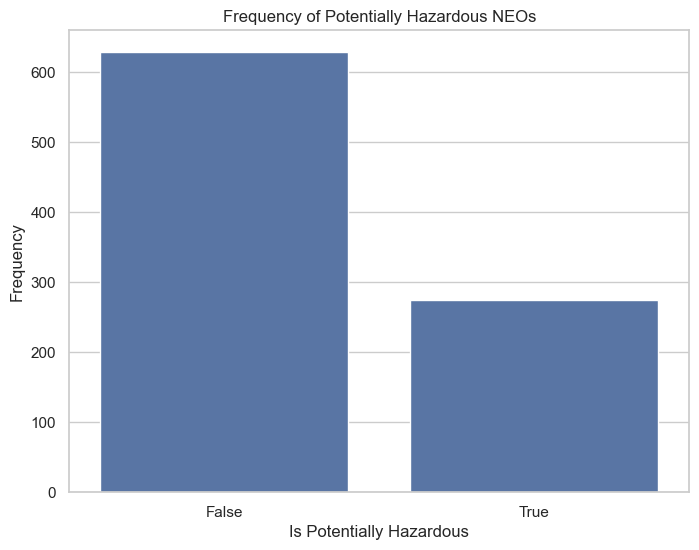

In [8]:
# visualizing the same data above with the help of a bar chart
sns.set(style="whitegrid")
plt.figure(figsize = (8,6))
sns.barplot(x=list(potentially_hazardous_freq.keys()), y=list(potentially_hazardous_freq.values()))
plt.xlabel("Is Potentially Hazardous")
plt.ylabel("Frequency")
plt.title("Frequency of Potentially Hazardous NEOs")
plt.show()

In [9]:
neo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            904 non-null    int64  
 1   Neo Reference ID              904 non-null    int64  
 2   Name                          904 non-null    object 
 3   Limited Name                  904 non-null    object 
 4   Designation                   904 non-null    int64  
 5   NASA JPL URL                  904 non-null    object 
 6   Absolute Magnitude (H)        904 non-null    float64
 7   Min Diameter (km)             904 non-null    float64
 8   Max Diameter (km)             904 non-null    float64
 9   Min Diameter (m)              904 non-null    float64
 10  Max Diameter (m)              904 non-null    float64
 11  Min Diameter (miles)          904 non-null    float64
 12  Max Diameter (miles)          904 non-null    float64
 13  Min D

In [10]:
neo_df.nunique()

ID                               20
Neo Reference ID                 20
Name                             20
Limited Name                     20
Designation                      20
NASA JPL URL                     20
Absolute Magnitude (H)           20
Min Diameter (km)                20
Max Diameter (km)                20
Min Diameter (m)                 20
Max Diameter (m)                 20
Min Diameter (miles)             20
Max Diameter (miles)             20
Min Diameter (feet)              20
Max Diameter (feet)              20
Is Potentially Hazardous          2
Close Approach Date             903
Close Approach Date (Full)      904
Epoch Date Close Approach       904
Relative Velocity (km/s)        904
Relative Velocity (km/h)        904
Relative Velocity (miles/h)     904
Miss Distance (astronomical)    904
Miss Distance (lunar)           904
Miss Distance (km)              904
Miss Distance (miles)           904
Orbiting Body                     5
dtype: int64

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Neo Reference ID'}>,
        <Axes: title={'center': 'Designation'}>,
        <Axes: title={'center': 'Absolute Magnitude (H)'}>],
       [<Axes: title={'center': 'Min Diameter (km)'}>,
        <Axes: title={'center': 'Max Diameter (km)'}>,
        <Axes: title={'center': 'Min Diameter (m)'}>,
        <Axes: title={'center': 'Max Diameter (m)'}>],
       [<Axes: title={'center': 'Min Diameter (miles)'}>,
        <Axes: title={'center': 'Max Diameter (miles)'}>,
        <Axes: title={'center': 'Min Diameter (feet)'}>,
        <Axes: title={'center': 'Max Diameter (feet)'}>],
       [<Axes: title={'center': 'Epoch Date Close Approach'}>,
        <Axes: title={'center': 'Relative Velocity (km/s)'}>,
        <Axes: title={'center': 'Relative Velocity (km/h)'}>,
        <Axes: title={'center': 'Relative Velocity (miles/h)'}>],
       [<Axes: title={'center': 'Miss Distance (astronomical)'}>,
        <Axes: title={'cent

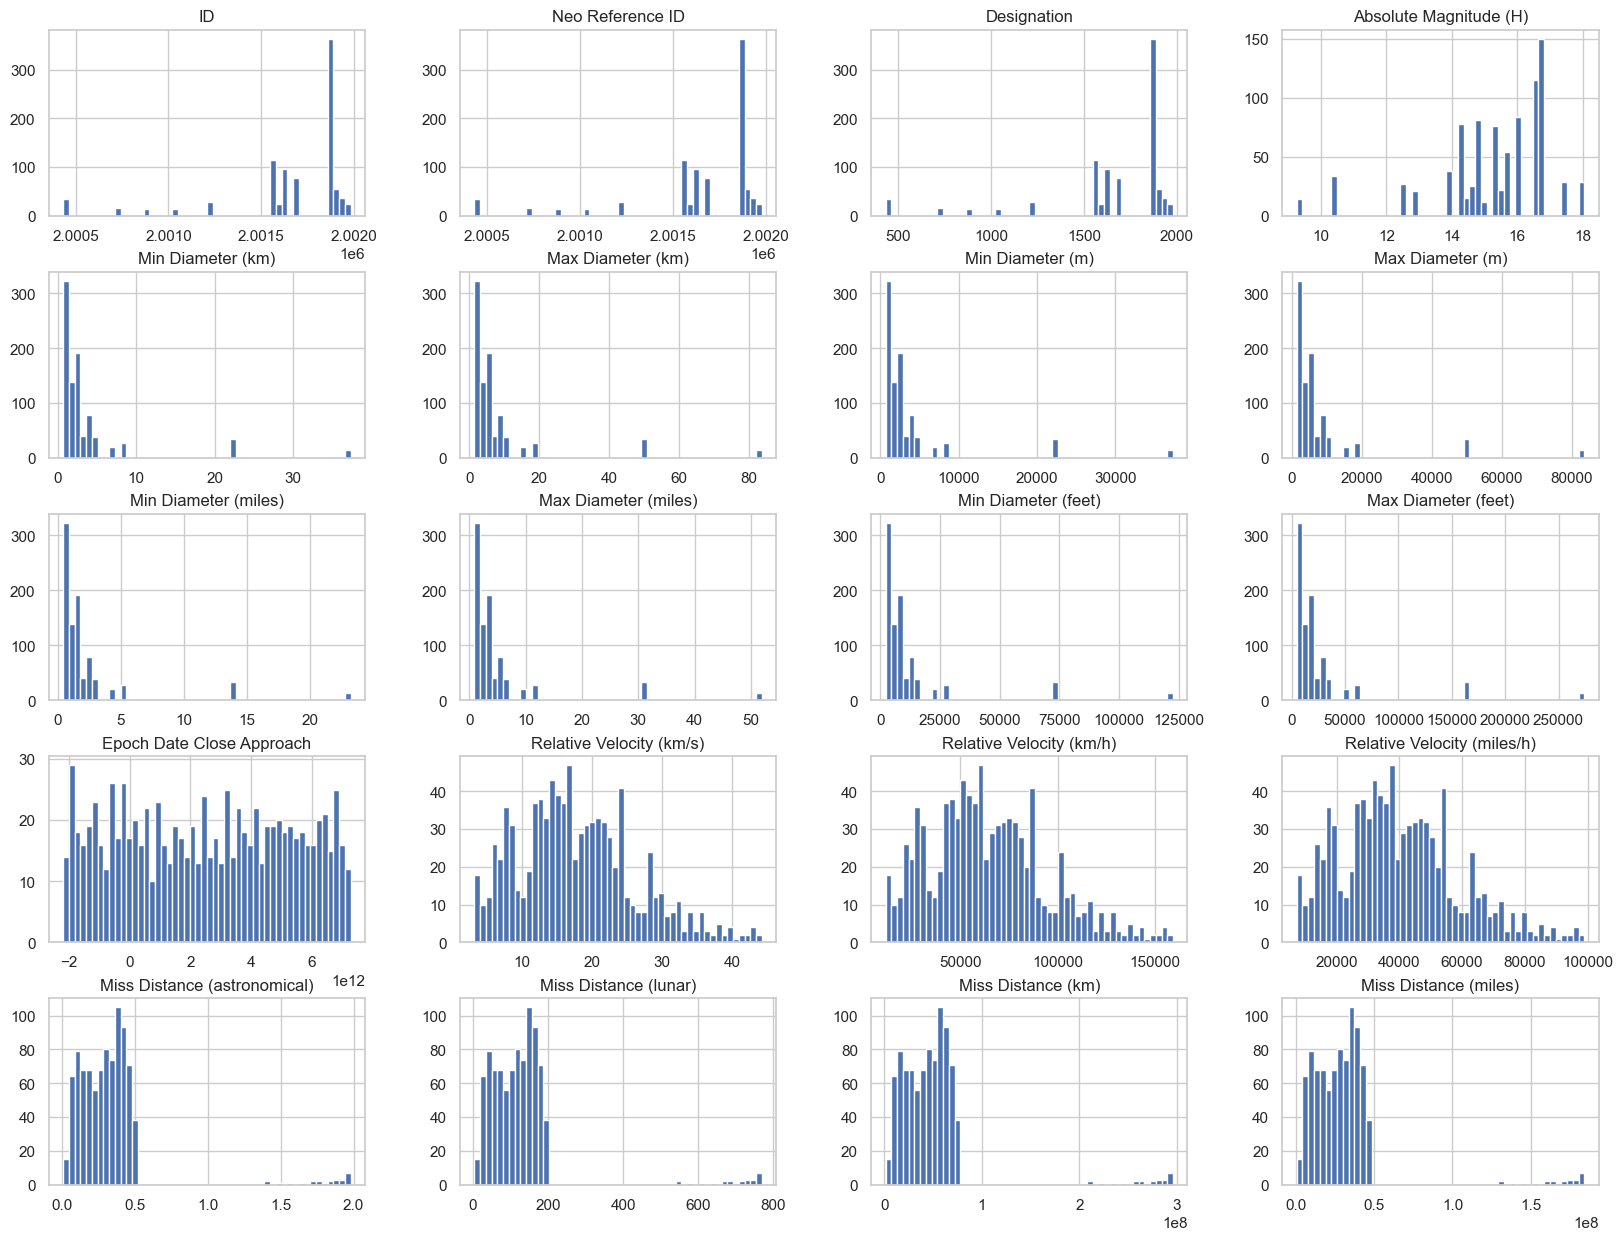

In [11]:
%matplotlib inline
neo_df.hist(bins=50, figsize=(20,15))

In [12]:
# next trying to understand the difference between ID and Neo Reference ID
neo_df["ID"].unique()

array([2000433, 2000719, 2000887, 2001036, 2001221, 2001566, 2001580,
       2001620, 2001627, 2001685, 2001862, 2001863, 2001864, 2001865,
       2001866, 2001915, 2001916, 2001917, 2001943, 2001980])

In [13]:
neo_df["Neo Reference ID"].unique()

array([2000433, 2000719, 2000887, 2001036, 2001221, 2001566, 2001580,
       2001620, 2001627, 2001685, 2001862, 2001863, 2001864, 2001865,
       2001866, 2001915, 2001916, 2001917, 2001943, 2001980])

We can see from the data as well as the above code that the ID column and the Neo Reference IDs both contain the same identical values.
Therefore we can drop one of these columns as well.

In [14]:
# dropping NEO Reference ID
neo_df.drop(columns=["Neo Reference ID"], inplace=True)


In [15]:
# undetstanding the data of 5 rows between 7th and 14th column (Min and Max Diameter in different units)
print(neo_df.iloc[:5, 7:15])

   Max Diameter (km)  Min Diameter (m)  Max Diameter (m)  \
0          49.208483      22006.702711      49208.483223   
1          49.208483      22006.702711      49208.483223   
2          49.208483      22006.702711      49208.483223   
3          49.208483      22006.702711      49208.483223   
4          49.208483      22006.702711      49208.483223   

   Min Diameter (miles)  Max Diameter (miles)  Min Diameter (feet)  \
0             13.674327             30.576724         72200.470524   
1             13.674327             30.576724         72200.470524   
2             13.674327             30.576724         72200.470524   
3             13.674327             30.576724         72200.470524   
4             13.674327             30.576724         72200.470524   

   Max Diameter (feet)  Is Potentially Hazardous  
0        161445.160099                     False  
1        161445.160099                     False  
2        161445.160099                     False  
3        16144

array([[<Axes: title={'center': 'Min Diameter (km)'}>,
        <Axes: title={'center': 'Max Diameter (km)'}>,
        <Axes: title={'center': 'Max Diameter (m)'}>],
       [<Axes: title={'center': 'Min Diameter (m)'}>,
        <Axes: title={'center': 'Min Diameter (miles)'}>,
        <Axes: title={'center': 'Max Diameter (miles)'}>],
       [<Axes: title={'center': 'Min Diameter (feet)'}>,
        <Axes: title={'center': 'Max Diameter (feet)'}>, <Axes: >]],
      dtype=object)

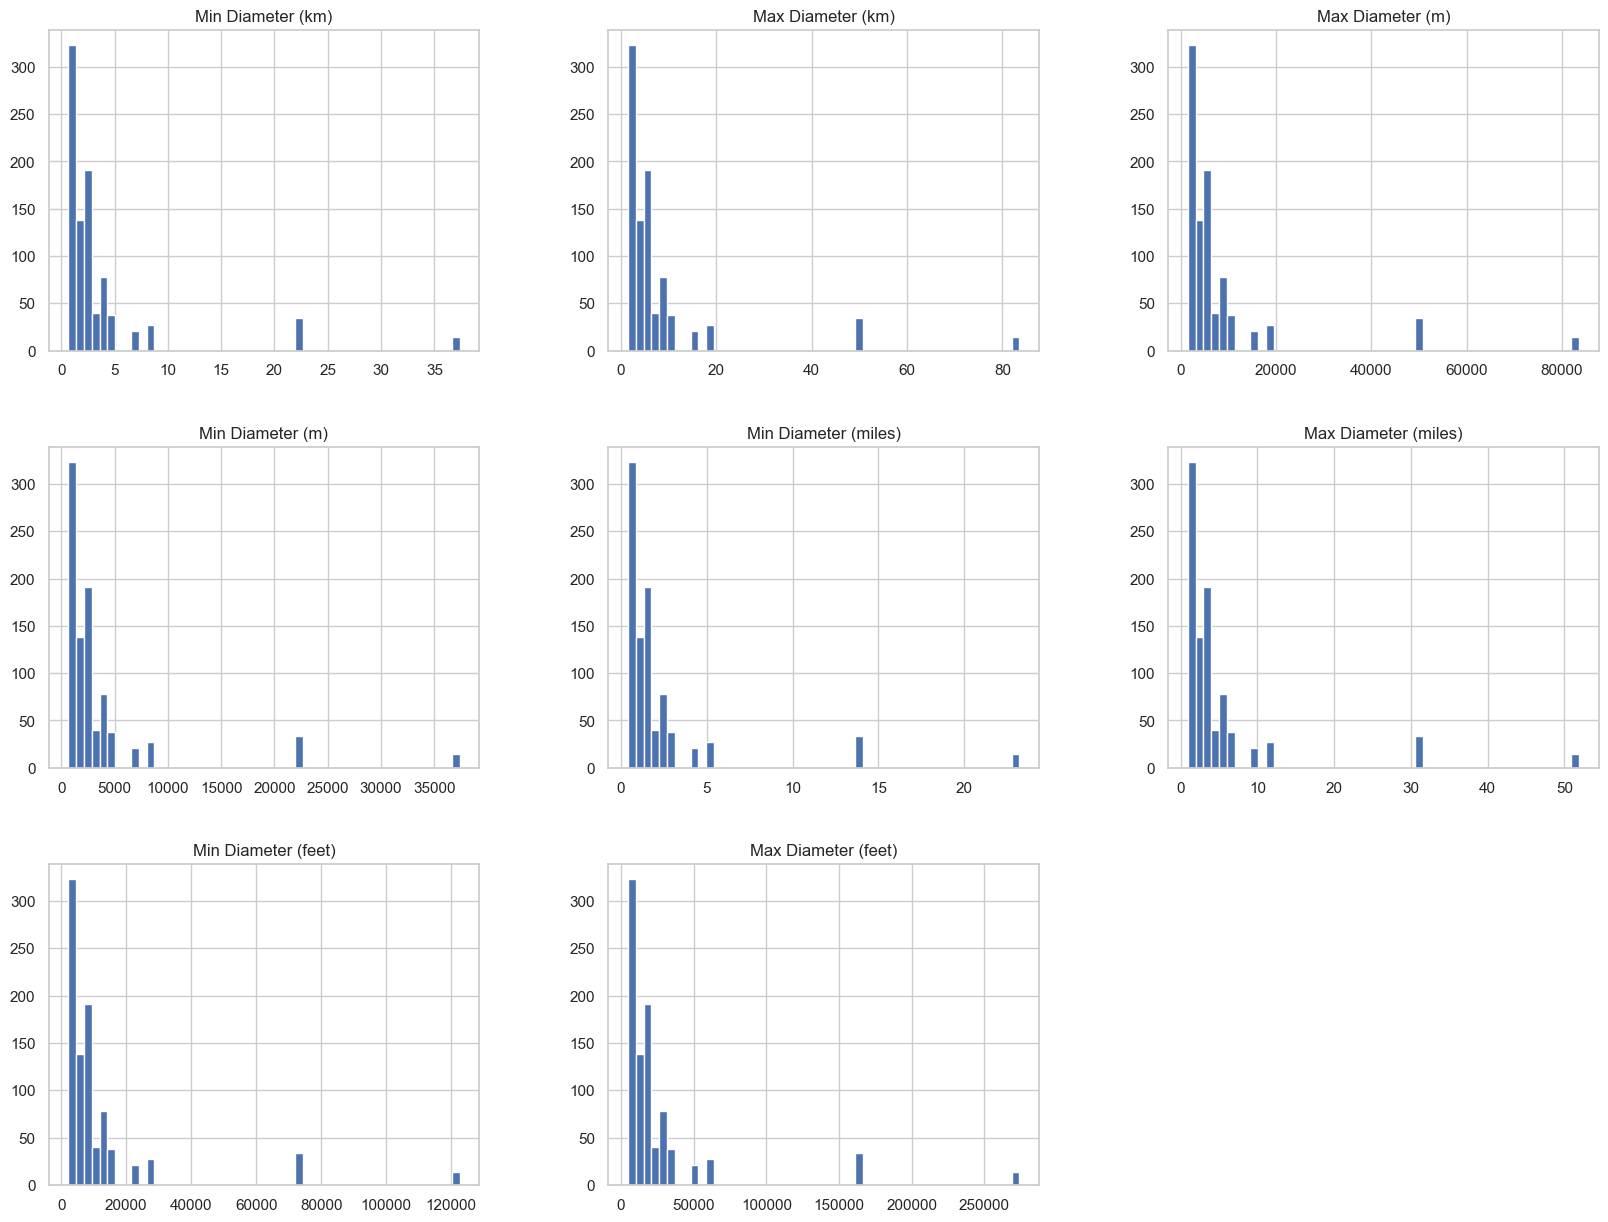

In [16]:
%matplotlib inline
neo_df.hist(column=["Min Diameter (km)", "Max Diameter (km)", "Max Diameter (m)", "Min Diameter (m)", "Min Diameter (miles)", "Max Diameter (miles)", "Min Diameter (feet)", "Max Diameter (feet)"], bins=50, figsize=(20,15))

We have columns with essentially the same data in different units. The graph clearly shows the fields following the same trend. Therefore we will drop all the columns except 'Max Diameter (miles)' & 'Min Diameter (miles)'

In [17]:
neo_df.drop(columns=["Min Diameter (km)", "Max Diameter (km)", "Max Diameter (m)", "Min Diameter (m)", "Min Diameter (feet)", "Max Diameter (feet)"], inplace=True)


In [18]:
# dropping rest of the similar columns
neo_df.drop(columns=["Close Approach Date", "Relative Velocity (km/h)", "Relative Velocity (miles/h)", "Miss Distance (km)", "Miss Distance (lunar)", "Miss Distance (miles)"], inplace=True)

In [19]:
neo_df.drop(columns=["Limited Name"], inplace=True)
neo_df.drop(columns=["NASA JPL URL", "Close Approach Date (Full)"], inplace=True)

In [20]:
# Name is not needed because we have another column called Designation which can uniquely identify each of the NEOs.
neo_df.drop(columns=["Name"], inplace=True)

In [21]:
neo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            904 non-null    int64  
 1   Designation                   904 non-null    int64  
 2   Absolute Magnitude (H)        904 non-null    float64
 3   Min Diameter (miles)          904 non-null    float64
 4   Max Diameter (miles)          904 non-null    float64
 5   Is Potentially Hazardous      904 non-null    bool   
 6   Epoch Date Close Approach     904 non-null    int64  
 7   Relative Velocity (km/s)      904 non-null    float64
 8   Miss Distance (astronomical)  904 non-null    float64
 9   Orbiting Body                 904 non-null    object 
dtypes: bool(1), float64(5), int64(3), object(1)
memory usage: 64.6+ KB


In [22]:
# creating a function which splits the data randomly

def split_train_test(data, test_ratio):
    np.random.seed(23) # setting the random number generator's seed will make sure that each time the same test and train set will be considered.
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [36]:
# here we are splitting the data into 80% training and 20% testing sets.
neo_trainset, neo_testset = split_train_test(neo_df, 0.2)

In [37]:
len(neo_trainset)

724

In [38]:
len(neo_testset)

180

### Visualizing the data

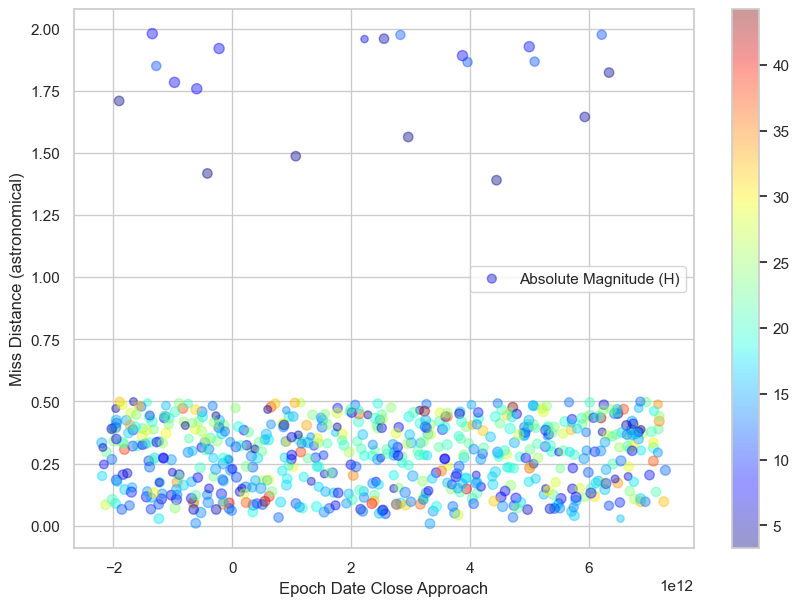

In [27]:

neo_trainset.plot(kind="scatter", x="Epoch Date Close Approach", y="Miss Distance (astronomical)", alpha=0.4,
            s=neo_trainset["Absolute Magnitude (H)"]*3, label="Absolute Magnitude (H)", figsize=(10,7),
            c=neo_trainset["Relative Velocity (km/s)"], colormap=plt.get_cmap("jet"), colorbar=True)
plt.legend()


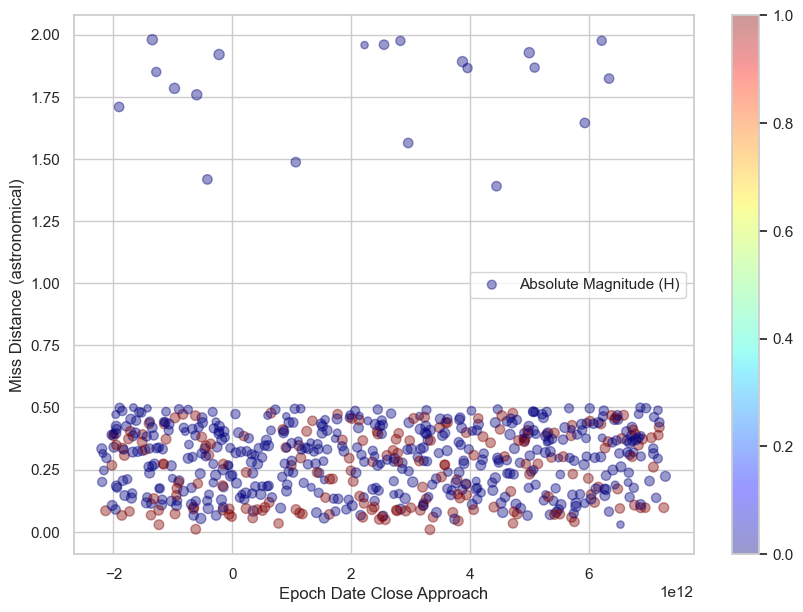

In [28]:
neo_trainset.plot(kind="scatter", x="Epoch Date Close Approach", y="Miss Distance (astronomical)", alpha=0.4,
            s=neo_trainset["Absolute Magnitude (H)"]*3, label="Absolute Magnitude (H)", figsize=(10,7),
            c=neo_trainset["Is Potentially Hazardous"], colormap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [29]:
neo_trainset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 633 entries, 14 to 595
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            633 non-null    int64  
 1   Designation                   633 non-null    int64  
 2   Absolute Magnitude (H)        633 non-null    float64
 3   Min Diameter (miles)          633 non-null    float64
 4   Max Diameter (miles)          633 non-null    float64
 5   Is Potentially Hazardous      633 non-null    bool   
 6   Epoch Date Close Approach     633 non-null    int64  
 7   Relative Velocity (km/s)      633 non-null    float64
 8   Miss Distance (astronomical)  633 non-null    float64
 9   Orbiting Body                 633 non-null    object 
dtypes: bool(1), float64(5), int64(3), object(1)
memory usage: 50.1+ KB


In [30]:
neo_trainset.nunique()

ID                               20
Designation                      20
Absolute Magnitude (H)           20
Min Diameter (miles)             20
Max Diameter (miles)             20
Is Potentially Hazardous          2
Epoch Date Close Approach       633
Relative Velocity (km/s)        633
Miss Distance (astronomical)    633
Orbiting Body                     5
dtype: int64

In [31]:
# removing the string values
neo_trainset_wo_string = neo_trainset.drop(columns=["Orbiting Body"])
corr_matrix = neo_trainset_wo_string.corr()
corr_matrix

,ID,Designation,Absolute Magnitude (H),Min Diameter (miles),Max Diameter (miles),Is Potentially Hazardous,Epoch Date Close Approach,Relative Velocity (km/s),Miss Distance (astronomical)
ID,1.000000,1.000000,0.501806,-0.608454,-0.608454,0.026818,0.049708,0.297647,-0.124997
Designation,1.000000,1.000000,0.501806,-0.608454,-0.608454,0.026818,0.049708,0.297647,-0.124997
Absolute Magnitude (H),0.501806,0.501806,1.000000,-0.854922,-0.854922,0.279307,-0.001294,0.209369,-0.021719
Min Diameter (miles),-0.608454,-0.608454,-0.854922,1.000000,1.000000,-0.224520,-0.009153,-0.230200,0.053664
Max Diameter (miles),-0.608454,-0.608454,-0.854922,1.000000,1.000000,-0.224520,-0.009153,-0.230200,0.053664
Is Potentially Hazardous,0.026818,0.026818,0.279307,-0.224520,-0.224520,1.000000,0.033548,0.279697,-0.174216
Epoch Date Close Approach,0.049708,0.049708,-0.001294,-0.009153,-0.009153,0.033548,1.000000,0.063294,0.006811
Relative Velocity (km/s),0.297647,0.297647,0.209369,-0.230200,-0.230200,0.279697,0.063294,1.000000,-0.140323
Miss Distance (astronomical),-0.124997,-0.124997,-0.021719,0.053664,0.053664,-0.174216,0.006811,-0.140323,1.000000


## Preparing the Data for ML Algorithms

In [32]:
# data cleaning

# columns 'Orbiting Body' are in String but they both need to be converted into numeric values for the machine learning models.
neo_df["Orbiting Body"].unique()


array(['Earth', 'Juptr', 'Mars', 'Merc', 'Venus'], dtype=object)

In [33]:
# neo_trainset["Orbiting Body"].unique()
# for this orbiting body field, we can use values from 0 - 4 based on how big the orbiting body is.
# Therefore
# 0 = Merc
# 1 = Mars
# 2 = Venus
# 3 = Earth
# 4 = Juptr

neo_df = neo_df.replace(to_replace="Merc", value=0)
neo_df = neo_df.replace(to_replace="Mars", value=1)
neo_df = neo_df.replace(to_replace="Venus", value=2)
neo_df = neo_df.replace(to_replace="Earth", value=3)
neo_df = neo_df.replace(to_replace="Juptr", value=4)
neo_df["Orbiting Body"].unique()

array([3, 4, 1, 0, 2])

In [34]:
neo_trainset["Orbiting Body"].unique()

array(['Earth', 'Merc', 'Juptr', 'Venus', 'Mars'], dtype=object)

In [35]:
# Converting True and False to 1 and 0 respectively in the Is Potentially Hazardous column
neo_df = neo_df.replace(to_replace=False, value=0)
neo_df = neo_df.replace(to_replace=True, value=1)
neo_df["Is Potentially Hazardous"].unique()

array([0, 1])

## Machine Learning Model
### Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
y = neo_trainset["Is Potentially Hazardous"]
X = neo_trainset.drop(columns="Is Potentially Hazardous")

tree_clf = DecisionTreeClassifier(max_depth=5, max_features="sqrt", random_state=23, splitter="random")
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=23,
                       splitter='random')

The Decision Tree model is trained. Now to view the tree we must do the following:

In [40]:
from sklearn.tree import export_graphviz


export_graphviz(
        tree_clf,
        out_file="neo_tree_2.dot",
        feature_names= X.columns.values.tolist(),
        class_names= "Is Potentially Hazardous",
        rounded=True,
        filled=True
    )


In [41]:
# now letting the system predict the values

# labels = neo_trainset["Is Potentially Hazardous"]
# testing_values = neo_trainset.drop(columns="Is Potentially Hazardous")

predictions = tree_clf.predict(X)
predictions


array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [42]:
from sklearn.metrics import mean_squared_error
tree_mean_sq_error = mean_squared_error(y, predictions)
tree_root_mean_sq_err = np.sqrt(tree_mean_sq_error)
tree_root_mean_sq_err
# >>> tree_mse = mean_squared_error(housing_labels, housing_predictions)
# >>> tree_rmse = np.sqrt(tree_mse)
# >>> tree_rmse

0.2290986421725451

In [42]:
labels = neo_testset["Is Potentially Hazardous"]
testing_values = neo_testset.drop(columns="Is Potentially Hazardous")

predictions = tree_clf.predict(testing_values)
predictions

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0])

In [43]:
tree_mean_sq_error = mean_squared_error(labels, predictions)
tree_root_mean_sq_err = np.sqrt(tree_mean_sq_error)
tree_root_mean_sq_err

0.0

## ANNs

In [43]:
import tensorflow as tf
from tensorflow import keras


In [44]:
ann_model = keras.models.Sequential()
ann_model.add(keras.layers.Dense(50, activation="relu"))
ann_model.add(keras.layers.Dense(25, activation="relu"))
ann_model.add(keras.layers.Dense(10, activation="relu"))
ann_model.add(keras.layers.Dense(5, activation="relu"))
ann_model.add(keras.layers.Dense(1, activation="sigmoid"))

In [45]:
# similar to the above decision tree example, we are adding the loss to be binary cross entropy using the adam optimizer
ann_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

# now running the training on the ANNs
# we will train the neural network 20 times with a batch size of 5. 
ann_model.fit(X, y, epochs=20, batch_size=5)

Epoch 1/20
145/145 [==============================] - 0s 685us/step - loss: 1141942400.0000 - accuracy: 0.5414
Epoch 2/20
145/145 [==============================] - 0s 674us/step - loss: 586262208.0000 - accuracy: 0.5815
Epoch 3/20
145/145 [==============================] - 0s 654us/step - loss: 928914688.0000 - accuracy: 0.6602
Epoch 4/20
145/145 [==============================] - 0s 745us/step - loss: 0.6769 - accuracy: 0.6975
Epoch 5/20
145/145 [==============================] - 0s 707us/step - loss: 0.6660 - accuracy: 0.6975
Epoch 6/20
145/145 [==============================] - 0s 723us/step - loss: 0.6564 - accuracy: 0.6975
Epoch 7/20
145/145 [==============================] - 0s 708us/step - loss: 0.6483 - accuracy: 0.6975
Epoch 8/20
145/145 [==============================] - 0s 607us/step - loss: 0.6413 - accuracy: 0.6975
Epoch 9/20
145/145 [==============================] - 0s 635us/step - loss: 0.6357 - accuracy: 0.6975
Epoch 10/20
145/145 [==============================] - 0s

In [46]:
loss, accuracy = ann_model.evaluate(X, y)
print(accuracy)

23/23 [==============================] - 0s 517us/step - loss: 0.6140 - accuracy: 0.6975
0.6975138187408447


## Dataset #2
### Heart Attack Risk Prediction Dataset
#### https://www.kaggle.com/datasets/shivd24coder/nasa-neo-near-earth-object-dataset/data

In [5]:
# reading the second dataset into dataframe objects
heart_dataset_path = 'heart_attack_prediction_dataset.csv'
heart_df = pd.read_csv(heart_dataset_path)

In [6]:
# Fist 5 rows
heart_df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [7]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [8]:
heart_df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [22]:
heart_df["Heart Attack Risk"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8763 entries, 0 to 8762
Series name: Heart Attack Risk
Non-Null Count  Dtype
--------------  -----
8763 non-null   int64
dtypes: int64(1)
memory usage: 68.6 KB


In [23]:
heart_df["Heart Attack Risk"].describe()

count    8763.000000
mean        0.358211
std         0.479502
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Heart Attack Risk, dtype: float64

In [24]:
# similar to the previous dataset, we find the frequency of the output variable 'Heart Attack Risk'
ha_risk_freq = Counter(heart_df["Heart Attack Risk"])
ha_risk_freq

Counter({0: 5624, 1: 3139})

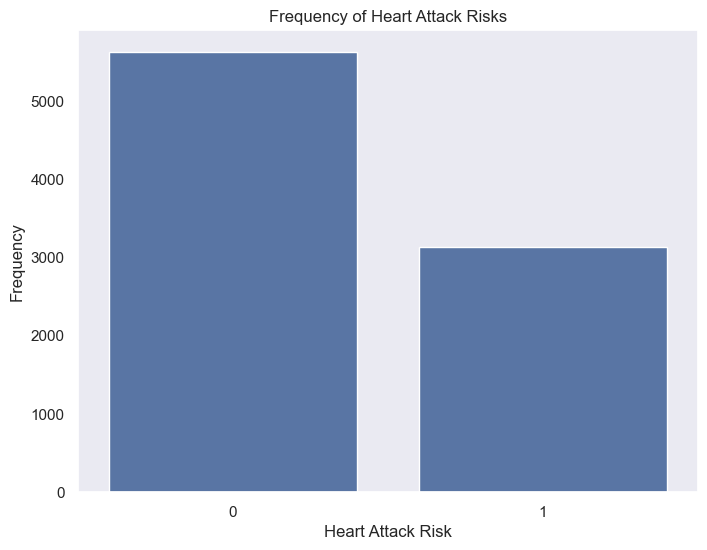

In [26]:
sns.set(style="dark")
plt.figure(figsize = (8,6))
sns.barplot(x=list(ha_risk_freq.keys()), y=list(ha_risk_freq.values()))
plt.xlabel("Heart Attack Risk")
plt.ylabel("Frequency")
plt.title("Frequency of Heart Attack Risks")
plt.show()